# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [ ]:
# Importa las librerias <3 
import pandas as pd

In [5]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
def extraer_datos(root, database):
    csv_path = root + database
    return pd.read_csv(csv_path)

# Complemento con la dirección específica de la base de datos que queremos
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/Capitulo_3/"
MEDICAMENTOS = "drug200.csv"

# Extrae los datos
df = extraer_datos(DOWNLOAD_ROOT, MEDICAMENTOS)

In [6]:
# Visualiza el DataFrame
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [7]:
# Obten información de los datos.
print("\nInformación del DataFrame:")
print(df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


## <span style="color:green">2. Análisis de cada Variable</span>

Max Age: 74
Min Age: 15


<Figure size 900x500 with 0 Axes>

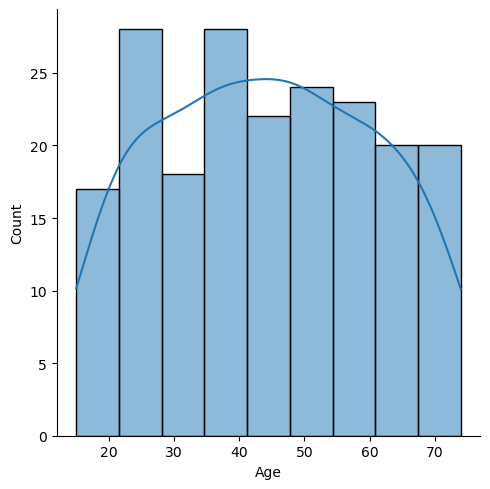

In [8]:
#Importa seaborn para tener gráficos más chidos 
import seaborn as sns
import matplotlib.pyplot as plt

#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())
plt.figure(figsize=(9, 5)) 

#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.Age, kde=True)
plt.show()

In [9]:
# Género: cuenta cuántos hombres y mujeres hay
print(df.Sex.value_counts())

Sex
M    104
F     96
Name: count, dtype: int64


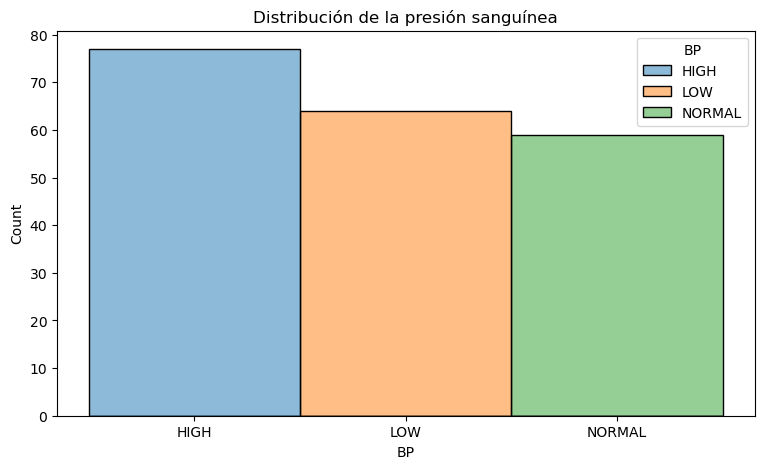

In [10]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize=(9, 5))

#histplot con seaborn
sns.histplot(data=df, x="BP", hue="BP")

plt.title("Distribución de la presión sanguínea")
plt.show()

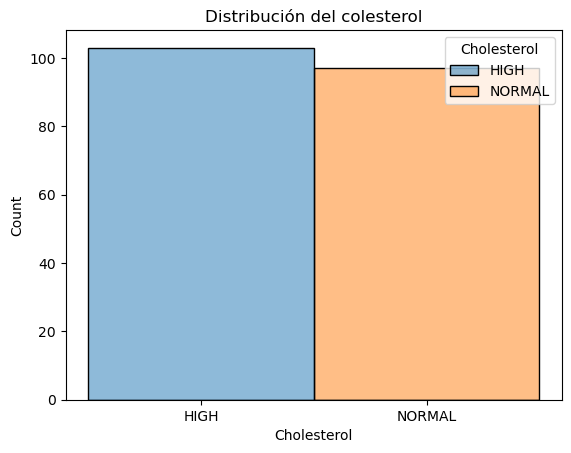

In [11]:
# Crea una gráfica de barras para Colesterol
#histplot para la variable Cholesterol
sns.histplot(data=df, x="Cholesterol", hue="Cholesterol")

plt.title("Distribución del colesterol")
plt.show()

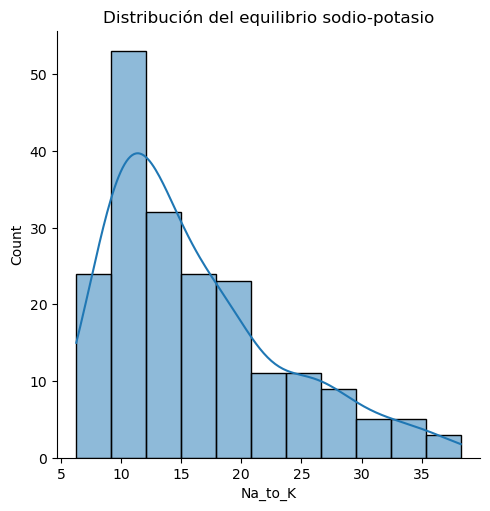

In [14]:
# Crea un displot para Sodio Potasio
#displot de Na_to_K con kde
sns.displot(df.Na_to_K, kde=True)

plt.title("Distribución del equilibrio sodio-potasio")
plt.show()

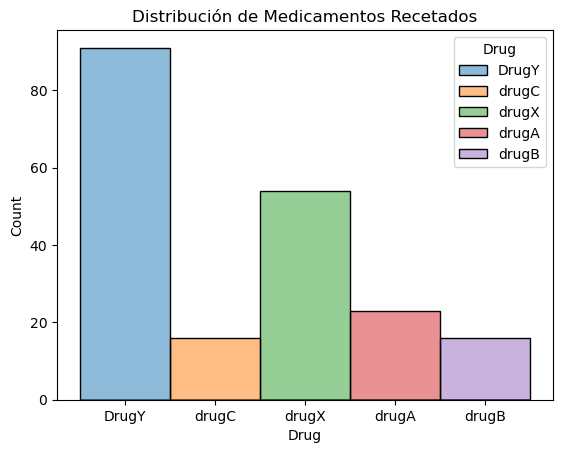


Cantidad de cada medicamento:
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [15]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
# histplot para la variable Drug
sns.histplot(data=df, x="Drug", hue="Drug")

plt.title("Distribución de Medicamentos Recetados")
plt.show()

#Cuenta los medicamentos
print("\nCantidad de cada medicamento:")
print(df.Drug.value_counts())

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


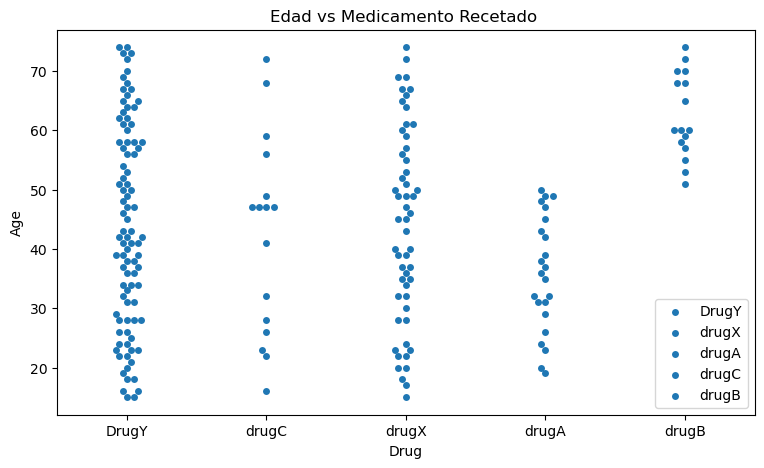

In [ ]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize=(9, 5))

# swarmplot
sns.swarmplot(x="Drug", y="Age", data=df)
plt.legend(df.Drug.value_counts().index)
plt.title("Edad vs medicamento recetado ")

plt.show()

    Drug Sex  Count
0  DrugY   F     47
1  DrugY   M     44
2  drugA   F      9
3  drugA   M     14
4  drugB   F      6
5  drugB   M     10
6  drugC   F      7
7  drugC   M      9
8  drugX   F     27
9  drugX   M     27


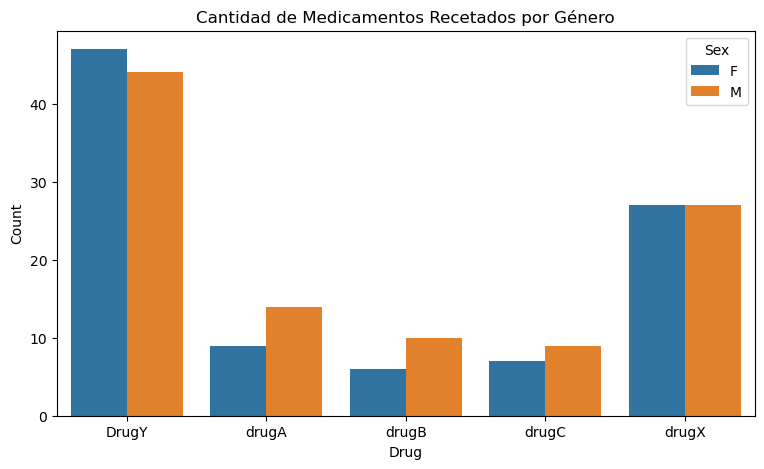

In [17]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas

# Agrupamos por Drug y Sex 
df_Sex_Drug = df.groupby(["Drug", "Sex"]).size().reset_index(name="Count")
print(df_Sex_Drug)

#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9, 5))
sns.barplot(data=df_Sex_Drug, x="Drug", y="Count", hue="Sex")

plt.title("Cantidad de Medicamentos Recetados por Género")
plt.show()

    Drug      BP  Count
0  DrugY    HIGH     38
1  DrugY     LOW     30
2  DrugY  NORMAL     23
3  drugA    HIGH     23
4  drugB    HIGH     16
5  drugC     LOW     16
6  drugX     LOW     18
7  drugX  NORMAL     36


c:\Users\adolf\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128138 (\N{PILL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


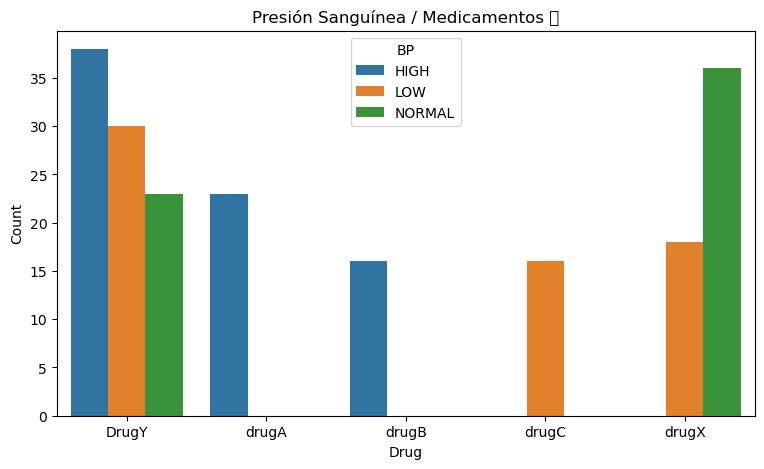

In [18]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊

# Agrupamos por Drug y BP
#contamos las incidencias
df_BP_Drug = df.groupby(["Drug", "BP"]).size().reset_index(name="Count")
print(df_BP_Drug)

#grafica de barras
plt.figure(figsize=(9, 5))
sns.barplot(x="Drug", y="Count", hue="BP", data=df_BP_Drug)

plt.title("Presión Sanguínea / Medicamentos 💊")
plt.show()

    Drug Cholesterol  Count
0  DrugY        HIGH     47
1  DrugY      NORMAL     44
2  drugA        HIGH     12
3  drugA      NORMAL     11
4  drugB        HIGH      8
5  drugB      NORMAL      8
6  drugC        HIGH     16
7  drugX        HIGH     20
8  drugX      NORMAL     34


c:\Users\adolf\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128138 (\N{PILL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


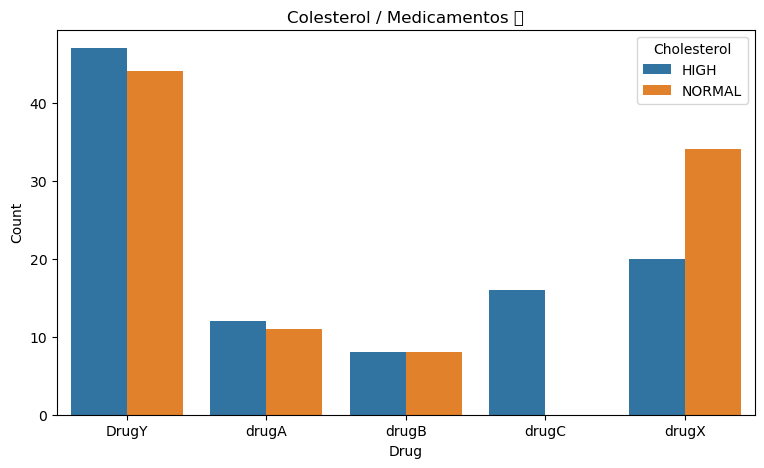

In [19]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊

# Agrupamos por Drug y Cholesterol y contamos incidencias
df_CH_Drug = df.groupby(["Drug", "Cholesterol"]).size().reset_index(name="Count")
print(df_CH_Drug)

# grafica de barras
plt.figure(figsize=(9, 5))
sns.barplot(x="Drug", y="Count", hue="Cholesterol", data=df_CH_Drug)

plt.title("Colesterol / Medicamentos 💊")
plt.show()

C:\Users\adolf\AppData\Local\Temp\ipykernel_23736\227233443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Drug", y="Na_to_K", data=df, palette="Set2")
c:\Users\adolf\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128138 (\N{PILL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


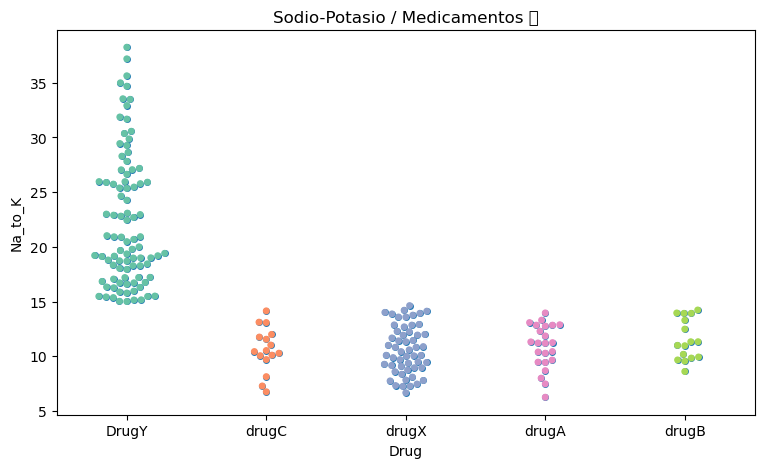

In [20]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da

plt.figure(figsize=(9, 5))

# swarmplot: x = medicamento, y = nivel de sodio-potasio
sns.swarmplot(x="Drug", y="Na_to_K", data=df)
sns.swarmplot(x="Drug", y="Na_to_K", data=df, palette="Set2")

plt.title("Sodio-Potasio / Medicamentos 💊")
plt.show()

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [21]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#función para codificar variables categóricas a numéricas
def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

# variables categóricas a transformar
variables = ["Sex", "BP", "Cholesterol", "Drug"]

for var in variables:
    label_encoder(var)

print(df.head())

# Separar los predictores (X) de la variable objetivo (y)
x = df.drop(["Drug"], axis=1)
y = df["Drug"]

# Dividir el dataset en entrenamiento (80%) y prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=True
)

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     0
1   47    1   1            0   13.093     3
2   47    1   1            0   10.114     3
3   28    0   2            0    7.798     4
4   61    0   1            0   18.043     0


In [22]:
# Crear set de entrenamiento y set de prueba
from sklearn.model_selection import train_test_split

# Mostramos las dimensiones de los conjuntos 
print("Tamaño de x_train:", x_train.shape)
print("Tamaño de x_test:", x_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de x_train: (160, 5)
Tamaño de x_test: (40, 5)
Tamaño de y_train: (160,)
Tamaño de y_test: (40,)


El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [23]:
## Crear modelo para medicamento
medicamento_objetivo = 3

# Crear etiquetas binarias para entrenamiento y prueba
y_train_c = (y_train == medicamento_objetivo)
y_test_c = (y_test == medicamento_objetivo)

resultado_train = list(zip(y_train.values, y_train_c.values))

for i in range(10):
    print(resultado_train[i])

(4, False)
(4, False)
(4, False)
(0, False)
(0, False)
(3, True)
(0, False)
(0, False)
(0, False)
(4, False)


Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [24]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42, class_weight="balanced")
sgd.fit(x_train, y_train_c)

nuevo_ejemplo = pd.DataFrame([[47, 1, 1, 0, 8]], columns=x_train.columns)
prediccion = sgd.predict(nuevo_ejemplo)

print("Predicción:", prediccion[0])

Predicción: True


In [25]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
nuevo_ejemplo = pd.DataFrame([[47, 1, 1, 0, 8]], columns=x_train.columns)

prediccion = sgd.predict(nuevo_ejemplo)

print("Predicción para el nuevo ejemplo:", prediccion[0])

Predicción para el nuevo ejemplo: True


👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [26]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 3 folds para evaluar precisión (accuracy)
scores = cross_val_score(sgd, x_train, y_train_c, cv=3, scoring='accuracy')

print("array", scores)
print(scores.mean())

array [0.07407407 0.1509434  0.60377358]
0.2762636850687165


 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [27]:
# Modelo que nunca es Y
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class ModeloNuncaY(BaseEstimator, ClassifierMixin):
    def fit(self, X, y=None):
        return self
    
    def predict(self, X):
        return np.array([False]*len(X))

# Instancia y predicciones
modelo_nunca_y = ModeloNuncaY()

y_train_pred = cross_val_predict(modelo_nunca_y, x_train, y_train_c, cv=3)

print(y_train_pred)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [28]:
# Matriz de confusión
#Importar cross_val_predict 
#Importar confusion_matrix
cm = confusion_matrix(y_train_c, y_train_pred)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[149   0]
 [ 11   0]]


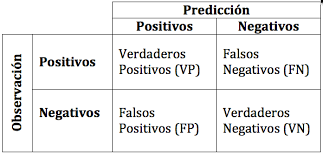

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [29]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score

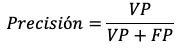

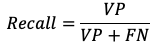

In [30]:
#Cambiar de clasificador
#Importar RandomForestClassifier

#Hacer la matriz de confusión otra vez

from sklearn.ensemble import RandomForestClassifier

# definir y_train_y
y_train_y = (y_train == 3)

#modelo Random Forest
rfc = RandomForestClassifier(random_state=42)

# Entrenamos el modelo
rfc.fit(x_train, y_train_y)

# Obtenemos las predicciones con cross_val_predict
y_train_pred_rf = cross_val_predict(rfc, x_train, y_train_y, cv=3)

cm_rf = confusion_matrix(y_train_y, y_train_pred_rf)
print("Matriz de confusión (Random Forest):")
print(cm_rf)

Matriz de confusión (Random Forest):
[[149   0]
 [  9   2]]


In [31]:
#Calcular la precisión y recall con el nuevo clasificador 

# Calcular precisión
p_rf = precision_score(y_train_y, y_train_pred_rf)

# Calcular recall
r_rf = recall_score(y_train_y, y_train_pred_rf)

print("Precisión (Random Forest):", p_rf)
print("Recall (Random Forest):", r_rf)

Precisión (Random Forest): 1.0
Recall (Random Forest): 0.18181818181818182


In [32]:
#Calcular F1
from sklearn.metrics import f1_score

# F1 del modelo SGD
f1_sgd = f1_score(y_train_y, y_train_pred) 
print("F1 score (SGD):", f1_sgd)

# F1 del modelo Random Forest
f1_rf = f1_score(y_train_y, y_train_pred_rf)
print("F1 score (Random Forest):", f1_rf)

F1 score (SGD): 0.0
F1 score (Random Forest): 0.3076923076923077


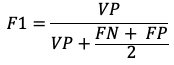

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [33]:
#Puntación de un paciente aleatorio

# Obtenemos la puntuación de decisión para un paciente aleatorio
y_score = sgd.decision_function([[47,1,1,0,8]])

print("Puntuación del paciente:", y_score)

# Comparar contra el umbral 0
threshold = 0
y_some_pred = (y_score > threshold)
print("¿clase positiva con 0?:", y_some_pred)

# Comparar contra el umbral 2000
threshold = 2000
y_some_pred = (y_score > threshold)
print("¿clase positiva con 2000?:", y_some_pred)

Puntuación del paciente: [30838.53053227]
¿clase positiva con 0?: [ True]
¿clase positiva con 2000?: [ True]


c:\Users\adolf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


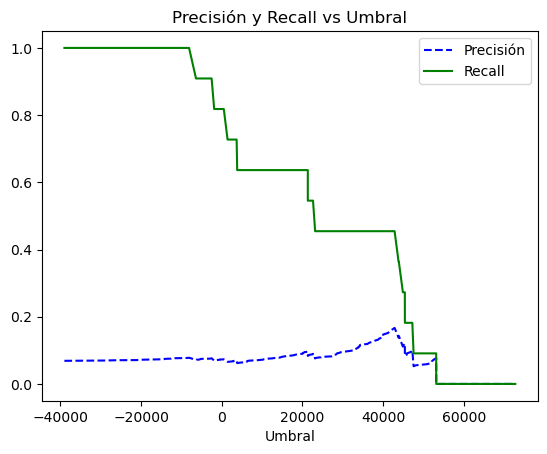

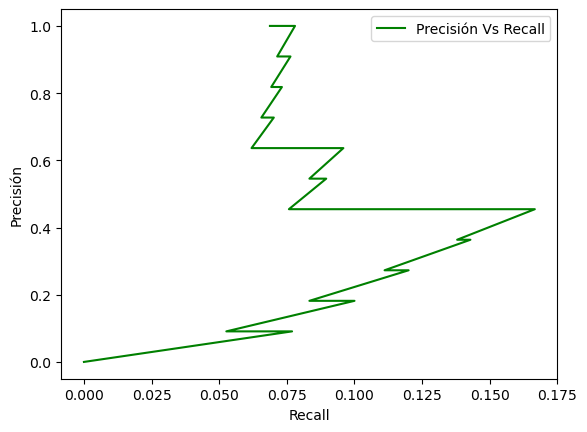

In [34]:
#Graficar la precisión y recall 

#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si

from sklearn.metrics import precision_recall_curve

# Obtener los puntajes de decisión usando cross_val_predict con method="decision_function"
y_scores = cross_val_predict(sgd, x_train, y_train_y, cv=3, method="decision_function")

# Obtener precisión, recall y umbrales
precisions, recalls, umbrales = precision_recall_curve(y_train_y, y_scores)

plt.plot(umbrales, precisions[:-1], "b--", label="Precisión")
plt.plot(umbrales, recalls[:-1], "g-", label="Recall")
plt.xlabel("Umbral")
plt.title("Precisión y Recall vs Umbral")
plt.legend()
plt.show()

plt.plot(precisions[:-1], recalls[:-1], "g-", label="Precisión Vs Recall")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.legend()
plt.show()


El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [35]:
#Supon que ya lo pensaste y querías un umbral  90 

# Buscar el umbral que nos da al menos 90% de precisión 
umbral_90 = umbrales[np.argmax(precisions[:-1] >= 0.90)]

print("Umbral para alcanzar 90% de precisión:", umbral_90)

# predicciones con base en el umbral seleccionado
y_train_90 = (y_scores >= umbral_90)


Umbral para alcanzar 90% de precisión: -38989.77516983758


In [36]:
#Arroja la precisión y recall para un umbral de 90

# precisión y recall con el nuevo umbral
precision_90 = precision_score(y_train_y, y_train_90)
recall_90 = recall_score(y_train_y, y_train_90)

print("Precisión con umbral 90%:", precision_90)
print("Recall con umbral 90%:", recall_90)

Precisión con umbral 90%: 0.06875
Recall con umbral 90%: 1.0


***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [37]:
#Importar roc_curve
from sklearn.metrics import roc_curve

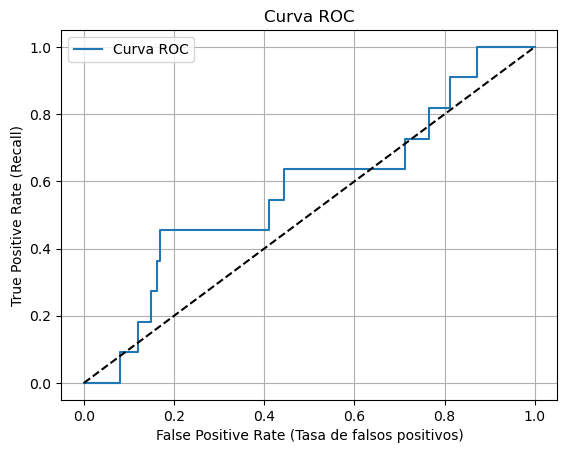

In [38]:
#Graficar la curva ROC
fpr, tpr, umbrales_roc = roc_curve(y_train_y, y_scores)

plt.plot(fpr, tpr, label="Curva ROC")
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate (Tasa de falsos positivos)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC")

#cuadrícula
plt.grid(True)
plt.legend()
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [39]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_train_y, y_scores)

print("Puntaje ROC AUC:", roc_auc)

Puntaje ROC AUC: 0.5735204392922514


In [40]:
#Compararlo con el modelo de random forest
from sklearn.metrics import roc_auc_score

y_scores_rf = cross_val_predict(rfc, x_train, y_train_y, cv=3, method="predict_proba")[:, 1]

roc_auc_sgd = roc_auc_score(y_train_y, y_scores)
print("ROC AUC (SGD):", roc_auc_sgd)

roc_auc_rf = roc_auc_score(y_train_y, y_scores_rf)
print("ROC AUC (Random Forest):", roc_auc_rf)

ROC AUC (SGD): 0.5735204392922514
ROC AUC (Random Forest): 0.9481391092129346


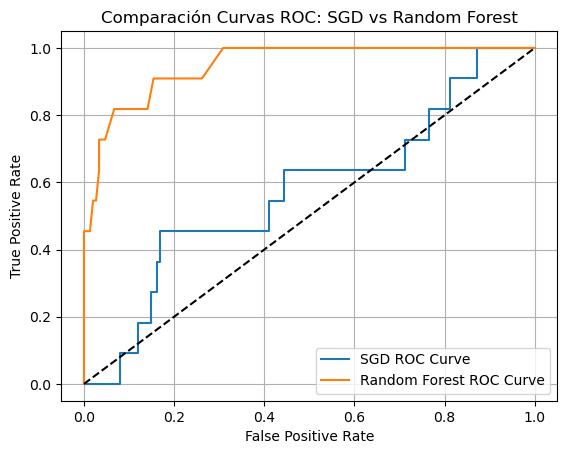

In [41]:
#Graficar la curva ROC y la predicción de random forest 

y_forest = cross_val_predict(rfc, x_train, y_train_y, cv=3, method="predict_proba")
y_scores_forest = y_forest[:, 1]

# Calcular FPR, TPR y umbrales para SGD
fpr_sgd, tpr_sgd, umbrales_sgd = roc_curve(y_train_y, y_scores)

# Calcular FPR, TPR y umbrales para Random Forest
fpr_forest, tpr_forest, umbral_forest = roc_curve(y_train_y, y_scores_forest)

plt.plot(fpr_sgd, tpr_sgd, label="SGD ROC Curve")
plt.plot(fpr_forest, tpr_forest, label="Random Forest ROC Curve")
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparación Curvas ROC: SGD vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
#Calcular el puntaje (área bajo la curva) de random forest  

#ROC AUC para Random Forest
roc_auc_forest = roc_auc_score(y_train_y, y_scores_forest)

print("ROC AUC (Random Forest):", roc_auc_forest)

ROC AUC (Random Forest): 0.9481391092129346


***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [43]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC

# clasificador SVM
svm = SVC()
# Entrenar con todo el set multiclase
svm.fit(x_train, y_train)

# DataFrame del paciente con las mismas columnas que x_train
columnas = x_train.columns  
paciente_df = pd.DataFrame([[25, 0, 1, 0, 167]], columns=columnas)

# #Predecir a un humano aleatorio para ver que todo este funcionando bien 
prediccion = svm.predict(paciente_df)
print("Predicción para el paciente:", prediccion)

Predicción para el paciente: [0]


In [44]:
#Utilizar decision_function para observar los puntajes de cada medicina 

columnas = x_train.columns
# DataFrame para el paciente
paciente_df = pd.DataFrame([[25, 0, 1, 0, 167]], columns=columnas)

# Obtener puntajes con decision_function del SVM
some_scores = svm.decision_function(paciente_df)
print("Puntajes por clase:", some_scores)

# Obtener índice del mayor puntaje
clase_predicha = np.argmax(some_scores)
print("Clase con mayor puntaje:", clase_predicha)

Puntajes por clase: [[ 4.24977865 -0.22882378  0.78948976  1.79321646  3.23938468]]
Clase con mayor puntaje: 0


In [45]:
#Ahora, utiliza el clasificador multiclase 
#Predecir a un humano ahora con este clasificador

from sklearn.multiclass import OneVsRestClassifier
svm_ovr = OneVsRestClassifier(SVC())

svm_ovr.fit(x_train, y_train)

columnas = x_train.columns  
paciente_df = pd.DataFrame([[25, 0, 1, 0, 167]], columns=columnas)

prediccion_ovr = svm_ovr.predict(paciente_df)
print("Predicción con OneVsRestClassifier:", prediccion_ovr)

Predicción con OneVsRestClassifier: [0]


In [46]:
#Utilizar decision_function para observar los puntajes de cada medicina 
columnas = x_train.columns  

# DataFrame con los datos del paciente
paciente_df = pd.DataFrame([[25, 0, 1, 0, 167]], columns=columnas)
some_scores_ovr = svm_ovr.decision_function(paciente_df)

print("Puntajes OneVsRestClassifier por clase:", some_scores_ovr)

Puntajes OneVsRestClassifier por clase: [[-0.01834837 -1.03901532 -1.11944804 -1.00714615 -0.94317182]]


In [47]:
#campararlo con los datos obtenidos de sgd.fit 
sgd.fit(x_train, y_train)

some_scores_sgd = sgd.decision_function(paciente_df)
print("Puntajes SGD por clase:", some_scores_sgd)

clase_predicha_sgd = np.argmax(some_scores_sgd)
print("Clase con mayor puntaje en SGD:", clase_predicha_sgd)

Puntajes SGD por clase: [[  32237.00267122  -14141.14435343 -183834.80335977  -94360.21458872
   -30292.34374281]]
Clase con mayor puntaje en SGD: 0


***

## <span style="color:green">8. Analizar Errores</span>

In [48]:
#Hacer un clasificador de random forest

# modelo Random Forest
rfc = RandomForestClassifier(random_state=42)

# Predicciones con validación cruzada
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)

conf_mz = confusion_matrix(y_train, y_train_pred)
print(conf_mz)

[[76  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  1 12  0  0]
 [ 0  0  0  7  4]
 [ 0  0  0  0 43]]


In [49]:
#Utilizar la matriz de confusión 

# modelo SGD
sgd = SGDClassifier(random_state=42)

# Predicciones con validación cruzada
y_train_pred = cross_val_predict(sgd, x_train, y_train, cv=3)

conf_mz = confusion_matrix(y_train, y_train_pred)
print(conf_mz)

[[60  2  0 12  2]
 [ 6  5  1  5  0]
 [ 1  7  1  4  0]
 [ 3  1  0  3  4]
 [ 7  8  0 13 15]]


In [50]:
#utilizar ahora SGD
# variable auxiliar (1 si Na_to_K > 15, si no 0)
df["Na_to_K_Bigger_Than_15"] = [1 if i > 15.015 else 0 for i in df["Na_to_K"]]
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,25.355,0,1
1,47,1,1,0,13.093,3,0
2,47,1,1,0,10.114,3,0
3,28,0,2,0,7.798,4,0
4,61,0,1,0,18.043,0,1
